# 영상입력 이진분류모델
### 활용 분야
- 입력된 얼굴 사진을 남자인지 여자인지 구분
- 촬영된 부품 사진이 정상인지 불량인지 구분
- 의료영상을 보고 질병 유무 판독

### 목차
- 다층 퍼셉트론 신경망 모델
- 컨볼루션 신경망 모델
- 깊은 컨볼루션 신경망 모델

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
width = 28
height = 28

## 1. 다층퍼셉트론 신경망 모델

### 데이터셋 준비

In [3]:
# 훈련셋과 테스트셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

In [4]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [5]:
# 데이터셋 전처리: 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### 모델 처리

In [7]:
# 모델 구성하기
model1 = Sequential()
model1.add(Dense(256, input_dim=width*height, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 332,801
Trainable params: 332,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
hist1 = model1.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

W0909 14:38:29.697930 18464 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.4381 - acc: 0.8167 - val_loss: 0.2813 - val_acc: 0.8882
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.2557 - acc: 0.8980 - val_loss: 0.2024 - val_acc: 0.9284
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.1874 - acc: 0.9311 - val_loss: 0.1510 - val_acc: 0.9486
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.1428 - acc: 0.9499 - val_loss: 0.1236 - val_acc: 0.9576
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.1177 - acc: 0.9594 - val_loss: 0.1058 - val_acc: 0.9652
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.1019 - acc: 0.9649 - val_loss: 0.0954 - val_acc: 0.9692
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.0904 - acc: 0.9687 - val_loss: 0.0882 - val_acc

### 학습과정 살펴보기

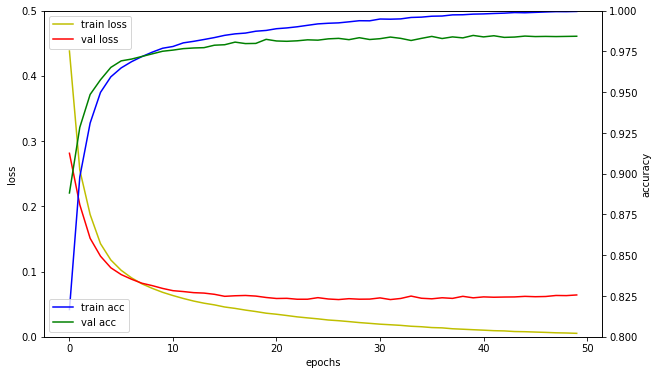

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist1.history['loss'], 'y', label='train loss')
loss_ax.plot(hist1.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist1.history['acc'], 'b', label='train acc')
acc_ax.plot(hist1.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [14]:
loss_and_metrics = model1.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 16us/step
## evaluation loss and metrics ##
[0.05738773024975671, 0.9832000070810318]


### 모델 사용하기

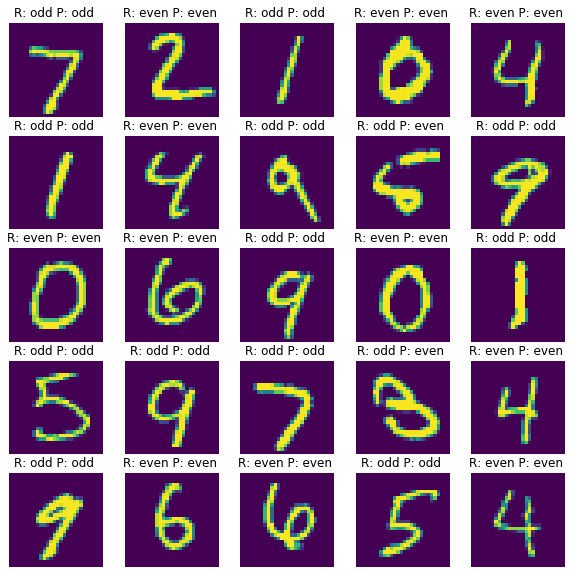

In [17]:
yhat_test = model1.predict(x_test, batch_size=100)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    if y_test[i]:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt_title += 'P: '
    if yhat_test[i] >= 0.5:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()

## 2. 컨볼루션 신경망 모델

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

### 데이터셋 준비

In [28]:
# 훈련셋과 테스트셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [30]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [31]:
# 데이터셋 전처리: 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### 모델 처리

In [25]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [26]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.5413 - acc: 0.7682 - val_loss: 0.3482 - val_acc: 0.8525
Epoch 2/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.2963 - acc: 0.8766 - val_loss: 0.2243 - val_acc: 0.9147
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.2081 - acc: 0.9206 - val_loss: 0.1618 - val_acc: 0.9449
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.1538 - acc: 0.9453 - val_loss: 0.1829 - val_acc: 0.9228
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.1215 - acc: 0.9572 - val_loss: 0.0973 - val_acc: 0.9667
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.1005 - acc: 0.9653 - val_loss: 0.0821 - val_acc: 0.9728
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.0882 - acc: 0.9691 - val_loss: 0.0930 - 

### 학습과정 살펴보기

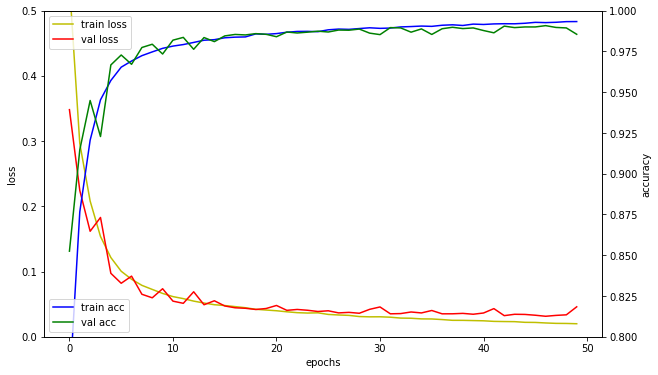

In [43]:
plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist2.history['acc'], 'b', label='train acc')
acc_ax.plot(hist2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 평가하기

In [34]:
loss_and_metrics = model2.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 0s 39us/step
## evaluation loss and metrics ##
[0.04117451302241534, 0.9872000062465668]


### 모델 사용하기

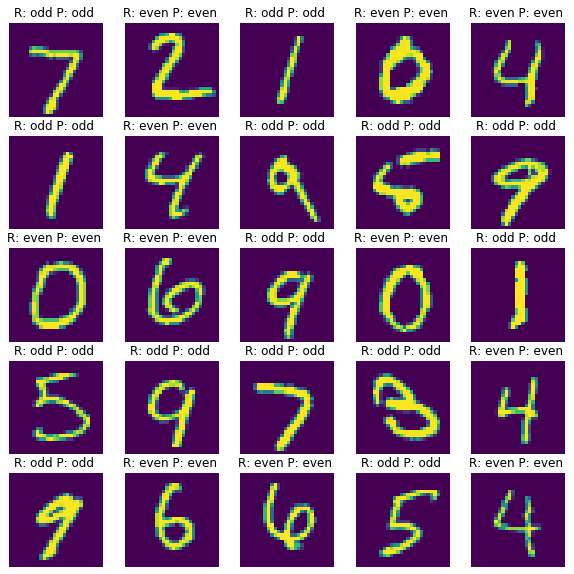

In [35]:
yhat_test = model2.predict(x_test, batch_size=100)

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    if y_test[i]:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt_title += 'P: '
    if yhat_test[i] >= 0.5:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()

## 3. 깊은 컨볼루션 신경망 모델

In [36]:
from keras.layers import Dropout

### 모델 처리

In [37]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

W0909 15:50:05.217658 18464 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)         

In [38]:
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [39]:
hist3 = model3.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.5654 - acc: 0.7006 - val_loss: 0.3498 - val_acc: 0.8521
Epoch 2/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.3658 - acc: 0.8390 - val_loss: 0.2472 - val_acc: 0.9071
Epoch 3/50
50000/50000 [==============================] - 24s 470us/step - loss: 0.2744 - acc: 0.8878 - val_loss: 0.1588 - val_acc: 0.9473
Epoch 4/50
50000/50000 [==============================] - 21s 430us/step - loss: 0.2073 - acc: 0.9201 - val_loss: 0.1102 - val_acc: 0.9653
Epoch 5/50
50000/50000 [==============================] - 30s 608us/step - loss: 0.1628 - acc: 0.9389 - val_loss: 0.0884 - val_acc: 0.9698
Epoch 6/50
50000/50000 [==============================] - 37s 744us/step - loss: 0.1391 - acc: 0.9488 - val_loss: 0.0764 - val_acc: 0.9750
Epoch 7/50
50000/50000 [==============================] - 45s 893us/step - loss: 0.1203 - acc: 0.9561 - val_loss: 0.

### 학습과정 살펴보기

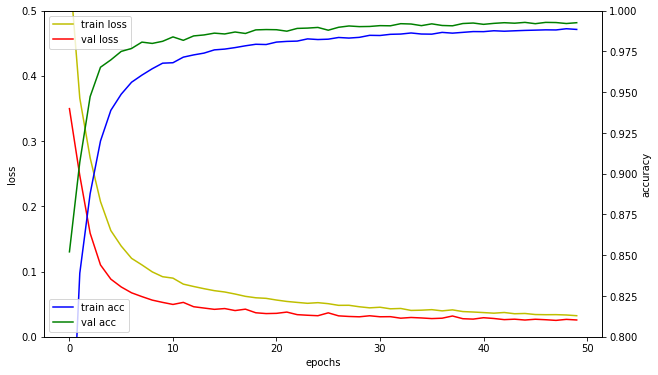

In [44]:
plt.rcParams['figure.figsize'] = (10, 6)
fit, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist3.history['acc'], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [45]:
### 모델 평가하기

In [46]:
loss_and_metrics = model3.evaluate(x_test, y_test, batch_size=100)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 71us/step
## evaluation loss and metrics ##
[0.01895182884851238, 0.9938000047206879]


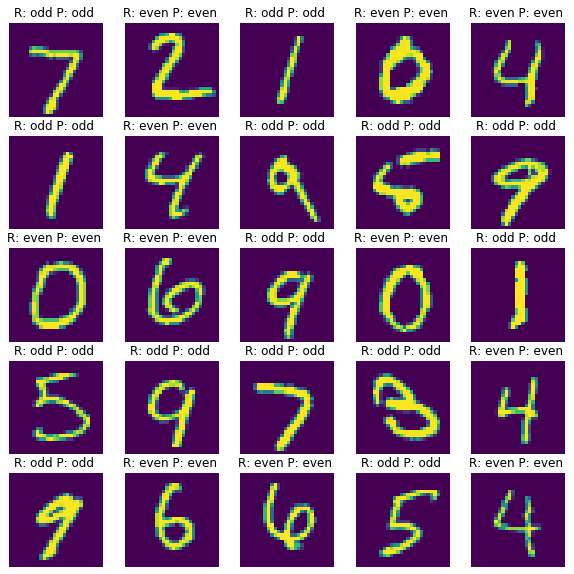

In [48]:
yhat_test = model3.predict(x_test, batch_size=100)

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    if y_test[i]:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt_title += 'P: '
    if yhat_test[i] >= 0.5:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()